In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The `modelnet40v1` dataset comprises 40 classes of objects:

In [12]:
from pathlib import Path

data_dir = Path('../data/modelnet40v1')
for idx, class_dir in enumerate(data_dir.iterdir()):
    print(f'Class {idx} - {class_dir.name.upper()}')

Class 0 - AIRPLANE
Class 1 - BATHTUB
Class 2 - BED
Class 3 - BENCH
Class 4 - BOOKSHELF
Class 5 - BOTTLE
Class 6 - BOWL
Class 7 - CAR
Class 8 - CHAIR
Class 9 - CONE
Class 10 - CUP
Class 11 - CURTAIN
Class 12 - DESK
Class 13 - DOOR
Class 14 - DRESSER
Class 15 - FLOWER_POT
Class 16 - GLASS_BOX
Class 17 - GUITAR
Class 18 - KEYBOARD
Class 19 - LAMP
Class 20 - LAPTOP
Class 21 - MANTEL
Class 22 - MONITOR
Class 23 - NIGHT_STAND
Class 24 - PERSON
Class 25 - PIANO
Class 26 - PLANT
Class 27 - RADIO
Class 28 - RANGE_HOOD
Class 29 - SINK
Class 30 - SOFA
Class 31 - STAIRS
Class 32 - STOOL
Class 33 - TABLE
Class 34 - TENT
Class 35 - TOILET
Class 36 - TV_STAND
Class 37 - VASE
Class 38 - WARDROBE
Class 39 - XBOX


 Each object class is divided into a `train` and `test` dataset. We shold note that there is no dedicated `validation` set so for simplicity we will be validating our model at training time using the `test` data.

In [13]:
for class_dataset_path in class_dir.iterdir():
    print(class_dataset_path)

../data/modelnet40v1/xbox/test
../data/modelnet40v1/xbox/train


Within each dataset we can find a list of images of 3D object shapes made in CAD. There is a set of unique objects that we will call `instances` going forward. For each unique object instance we get multiple images viewing them from multiple angles. The unique object instance identification number is noted in the filename, followed by the instance image number:

In [14]:
num_examples = 20
for idx, image_path in enumerate(class_dataset_path.iterdir()):
    print(image_path)
    if idx > num_examples: 
        print('...')
        break

../data/modelnet40v1/xbox/train/xbox_000000015_001.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_002.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_003.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_004.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_005.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_006.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_007.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_008.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_009.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_010.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_011.jpg
../data/modelnet40v1/xbox/train/xbox_000000015_012.jpg
../data/modelnet40v1/xbox/train/xbox_000000020_001.jpg
../data/modelnet40v1/xbox/train/xbox_000000020_002.jpg
../data/modelnet40v1/xbox/train/xbox_000000020_003.jpg
../data/modelnet40v1/xbox/train/xbox_000000020_004.jpg
../data/modelnet40v1/xbox/train/xbox_000000020_005.jpg
../data/modelnet40v1/xbox/train/xbox_000000020_006.jpg
../data/mo

We will look at some image examples shortly but first let's instantiate the defined dataset classes to make the analysis easier:

In [15]:
from dataset.mvcnn_dataset import MVCNNDataset

train_data = MVCNNDataset('train', verbose=False)
val_data = MVCNNDataset('test', verbose=False)

Now, let's examine the training data in a DataFrame form:

In [ ]:
train_df = train_data.get_summary_df()
display(train_df.head())
display(train_df.describe())

A quick glance shows that most classes are balanced and have exactly 80 instances and 960 images (12 images per unique instance). The classes that are underrepresented in the training dataset are shown below:

In [ ]:
train_df[
    (train_df['num_instances'] < train_df['num_instances'].max())
    | (train_df['num_images'] < train_df['num_images'].max())
]

Let's see if the same holds for the validation set:

In [ ]:
val_df = val_data.get_summary_df()
display(val_df.describe())
display(val_df[
    (val_df['num_instances'] < val_df['num_instances'].max())
    | (val_df['num_images'] < val_df['num_images'].max())
])

Unlike the training set, the validation set is perfectly balanced, with 40 instances / 240 images for each class

Now, let's look at the images themselves. We'll take a random instance from each of the classes of the training dataset:

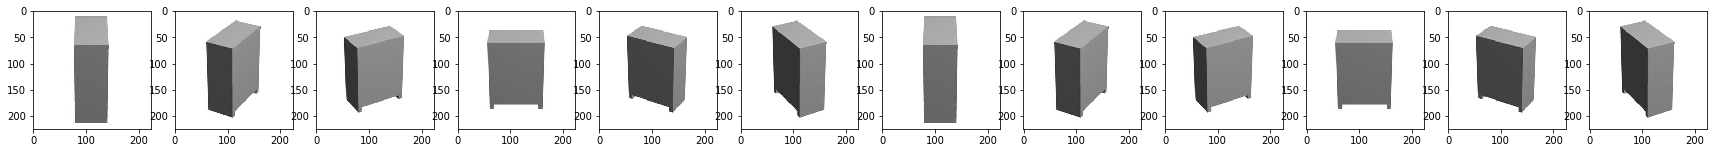

flower_pot
000000146


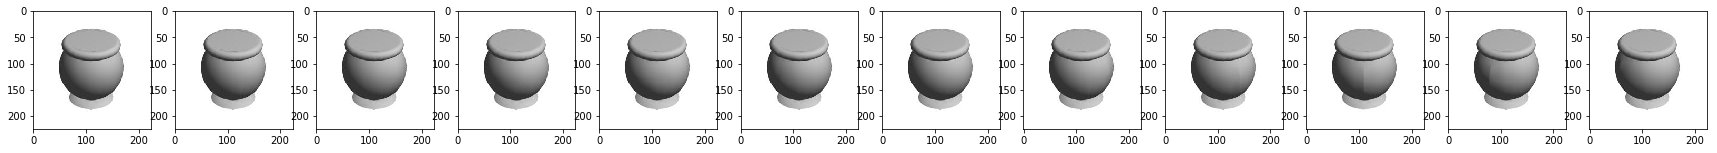

glass_box
000000142


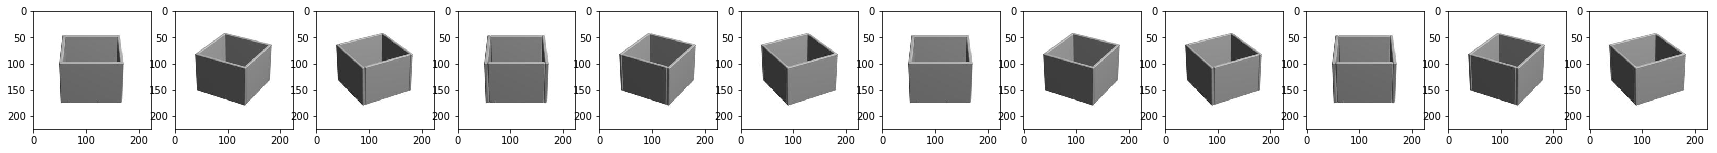

guitar
000000343


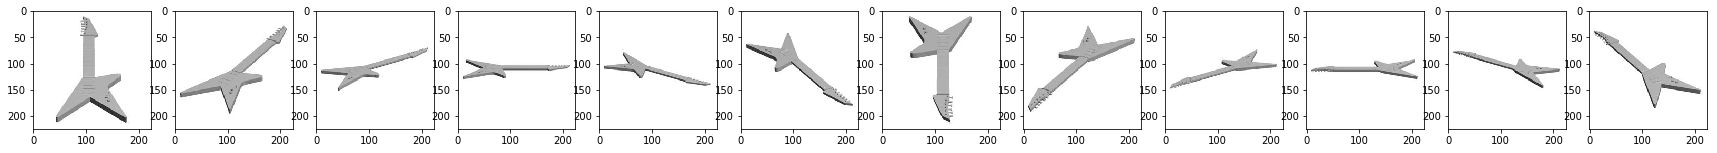

keyboard
000000074


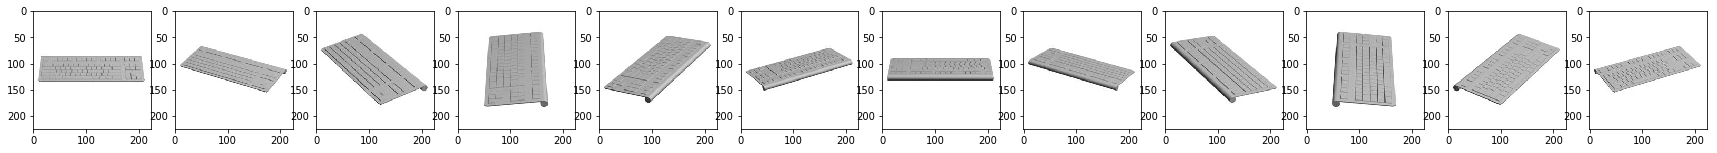

lamp
000001300


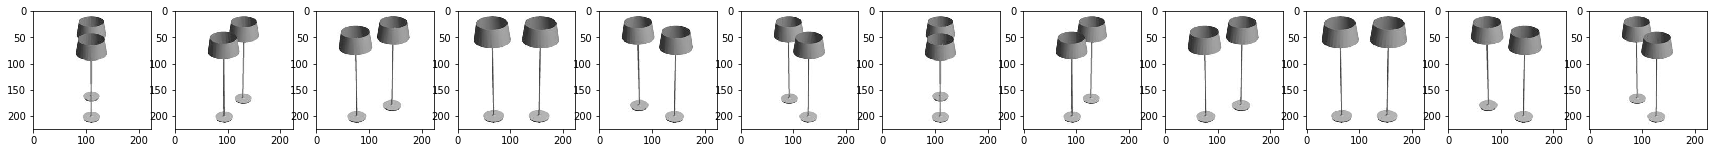

laptop
000000278


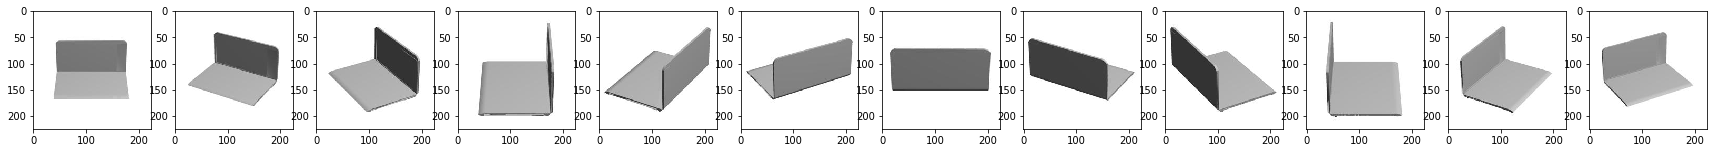

mantel
000000003


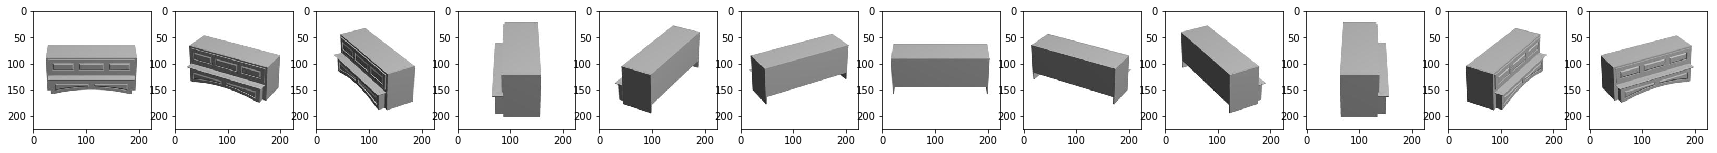

monitor
000000567


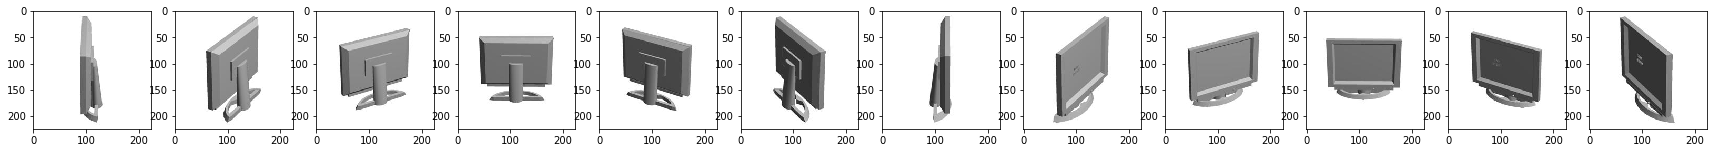

night_stand
000000266


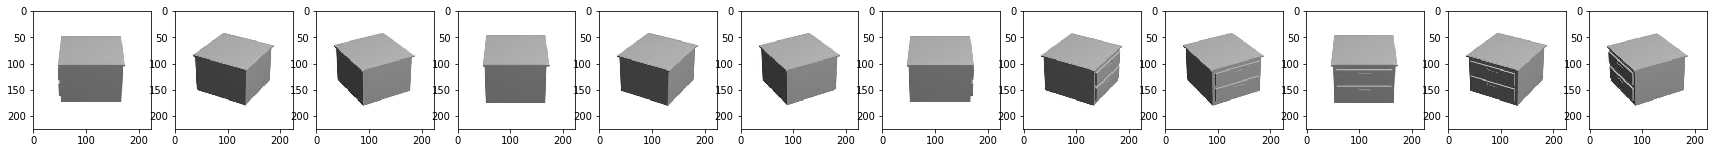

person
000001636


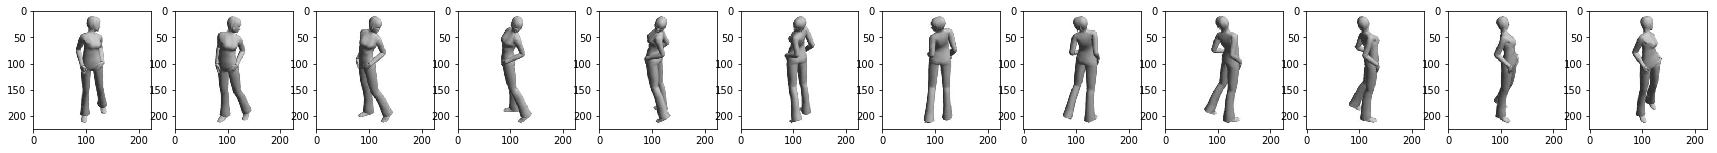

piano
000000047


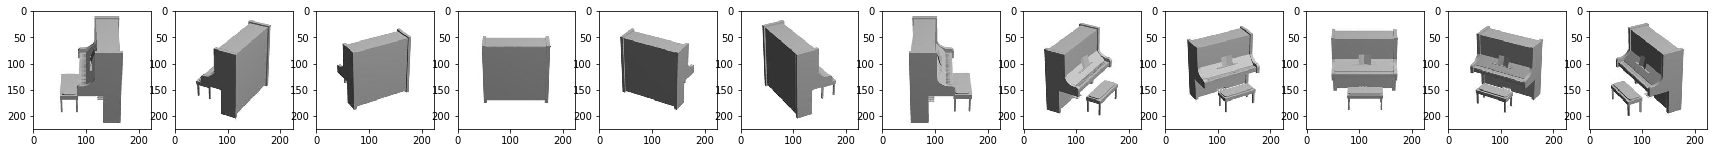

plant
000000324


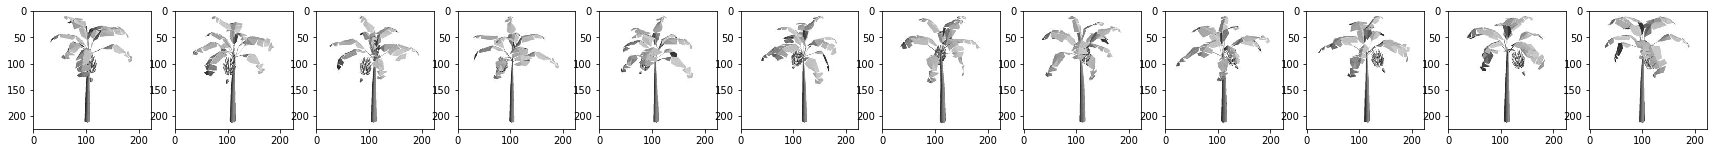

radio
000001147


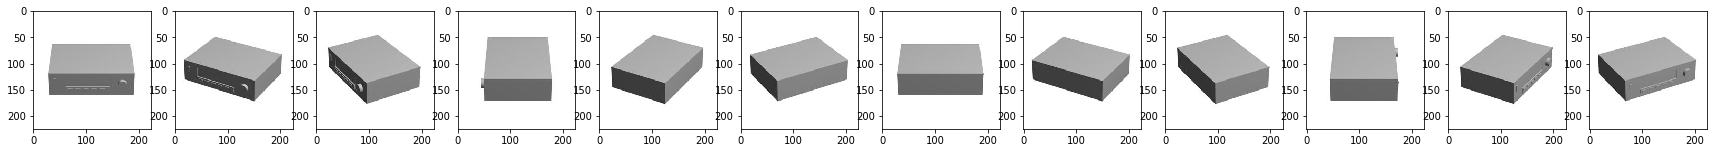

range_hood
000000661


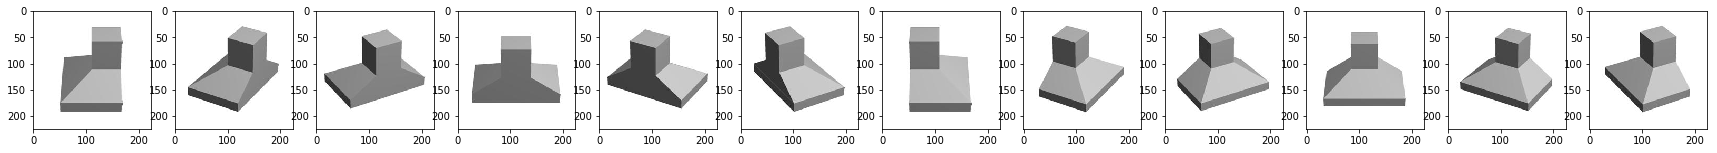

sink
000001363


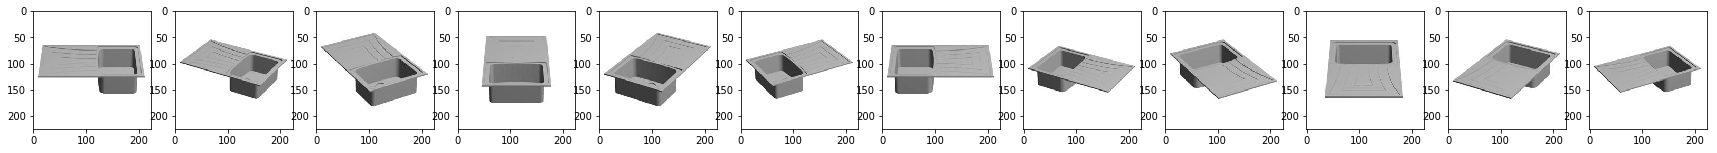

sofa
000000542


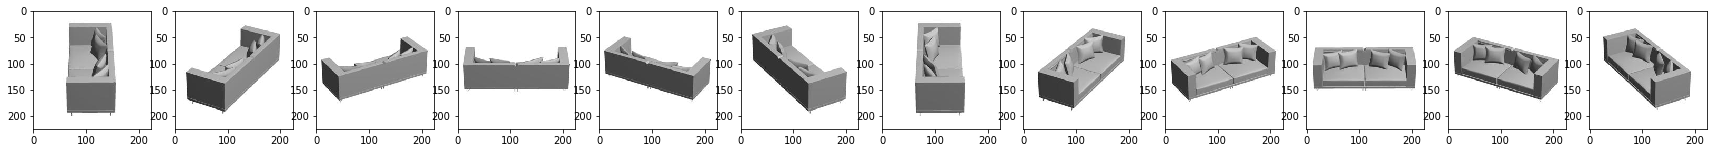

stairs
000001416


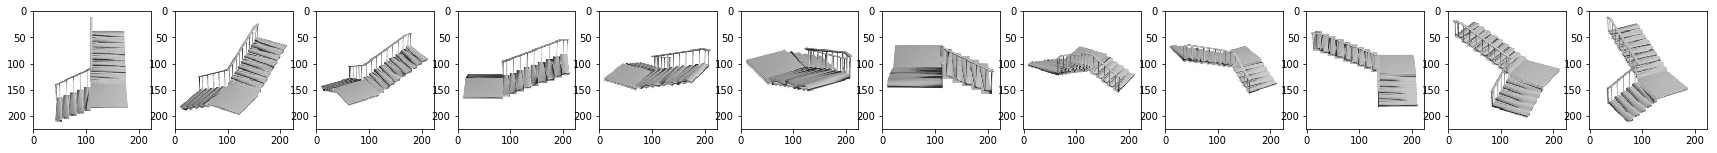

stool
000001668


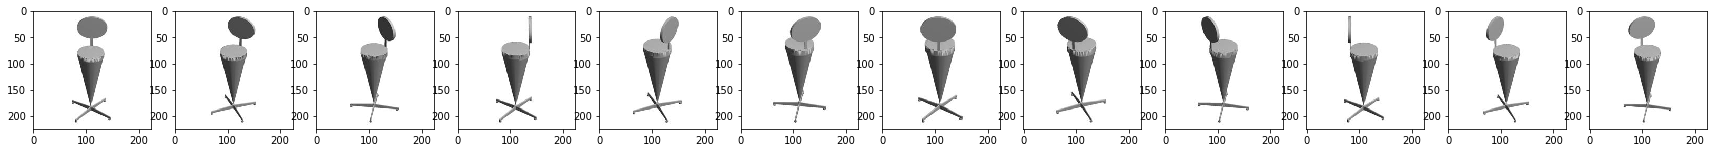

table
000000408


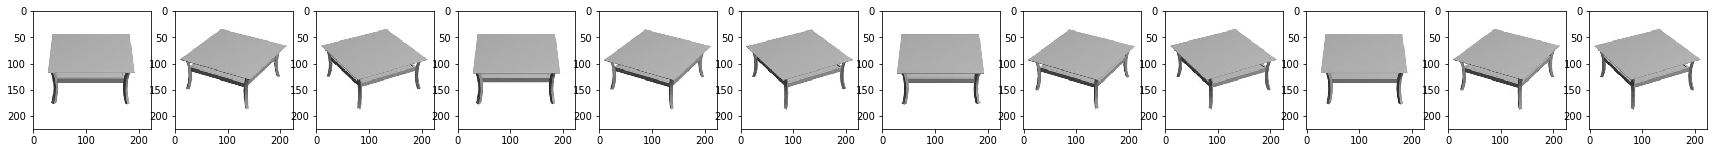

tent
000000671


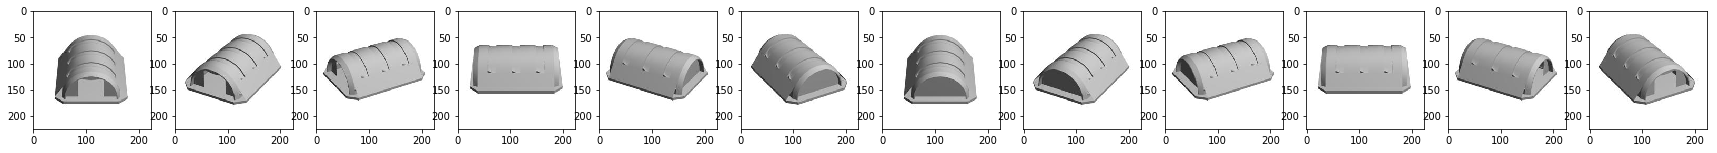

toilet
000000815


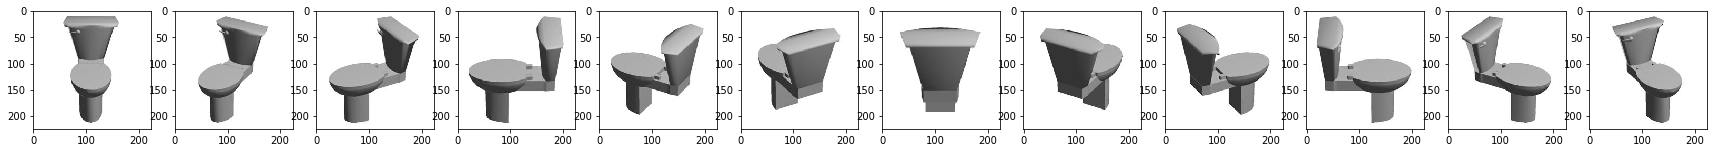

tv_stand
000000116


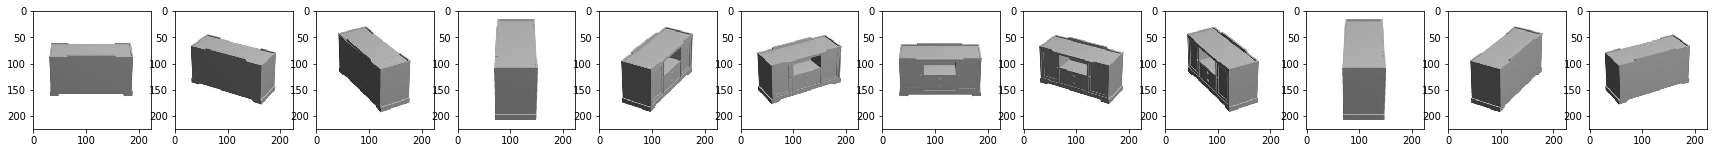

vase
000000164


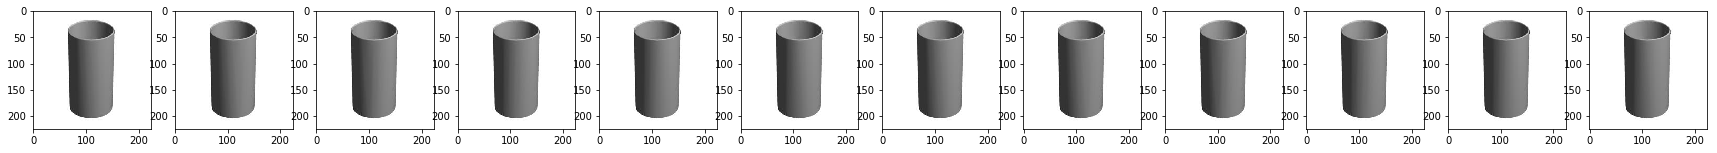

wardrobe
000000572


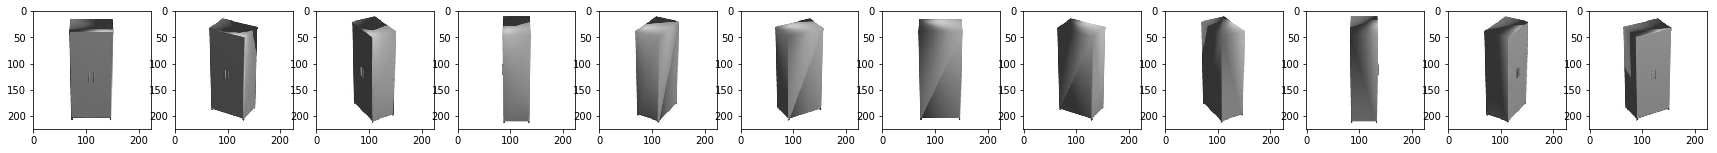

xbox
000001134


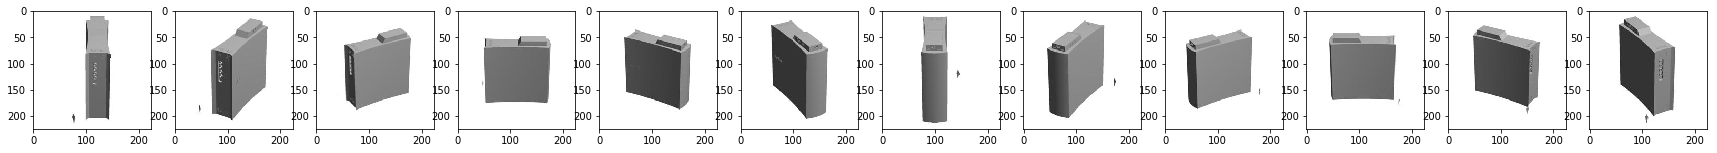

In [10]:
for class_id in train_df['class_id'].unique():
    train_data.view_random_instances(class_id)

As we can see, all images are of the same size - 224x224px - presenting the object instance from various angles.